### Importing Required Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pickle
import re

### Importing the data

In [2]:
train_path = "D:/Code/Projects/Bank Default Hackathon/Training Data.csv"
test_path = "D:/Code/Projects/Bank Default Hackathon/Test Data.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

### Missing values

In [3]:
def print_missing(dataset, print_percent=True):
    missing = dataset.isnull().mean()
    missing = missing[missing>0]
    
    if len(missing)>0:
        missing.sort_values(inplace=True,ascending=False)
        missing.plot.bar()
        plt.ylabel("Fraction missing values")
        plt.title("Missing values")
        if print_percent:
            missing_features = missing.index.tolist()
            print("Percent missing values: ")
            for feature in missing_features:
                print(feature,'  \t:' ,np.round(dataset[feature].isnull().mean(),4), '%')
    else:
        print("No missing values!")

In [4]:
print_missing(df_train)

No missing values!


In [5]:
print_missing(df_train)

No missing values!


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### Numerical, Year and Categorical features

In [7]:
def get_fnames_by_type(dataset):
    # list of numerical variables
    numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
    print('Number of numerical variables: ', len(numerical_features))

    year_features = [feature for feature in numerical_features if 'yr'\
                     in feature.lower() or 'year' in feature.lower()]
    print(f"Year features: {year_features}")
    
    categorical_features = [feature for feature in dataset.columns if \
                           feature not in numerical_features]
    print('Number of categorical variables: ', len(categorical_features))
    
    return numerical_features, year_features, categorical_features

In [8]:
numerical_features, year_features, categorical_features = \
get_fnames_by_type(df_train)

Number of numerical variables:  7
Year features: ['current_job_years', 'current_house_years']
Number of categorical variables:  6


## Categorical Features

In [9]:
print(categorical_features)

['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']


In [10]:
df_train[categorical_features].head()

,married,house_ownership,car_ownership,profession,city,state
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


## Get number of categories

In [11]:
def get_number_categories(dataset, categorical_features):
    print("Number of categories per categorical feature: ")
    for feature in categorical_features:
        print(f"{feature:20}: {len(dataset[feature].unique())}")

In [40]:
for col in categorical_features:
    df_train[col] = df_train[col].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x).strip())
    df_test[col] = df_test[col].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x).strip())

In [41]:
get_number_categories(df_train, categorical_features)

Number of categories per categorical feature: 
married             : 2
house_ownership     : 3
car_ownership       : 2
profession          : 51
city                : 316
state               : 28


In [42]:
get_number_categories(df_test, categorical_features)

Number of categories per categorical feature: 
married             : 2
house_ownership     : 3
car_ownership       : 2
profession          : 51
city                : 316
state               : 28


In [43]:
ptrain = set(df_train['profession'])

In [44]:
ptest = set(df_test['profession'])

In [45]:
ptrain-ptest

set()

In [46]:
ptest-ptrain

set()

In [47]:
profession = df_train.groupby('profession')['risk_flag'].mean().sort_values()

with open('profession.pickle', 'wb') as f:
    pickle.dump(dict(profession), f)
    f.close()
profession

profession
Technology specialist         0.081486
Petroleum Engineer            0.085102
Industrial Engineer           0.098667
Economist                     0.099278
Financial Analyst             0.103155
Design Engineer               0.106999
Web designer                  0.109135
Designer                      0.109178
Dentist                       0.109578
Mechanical engineer           0.111558
Chemical engineer             0.111623
Politician                    0.112257
Librarian                     0.112576
Drafter                       0.112894
Graphic Designer              0.115370
Fashion Designer              0.115385
Surgeon                       0.115465
Statistician                  0.115570
Civil servant                 0.115794
Engineer                      0.118083
Physician                     0.119188
Comedian                      0.119604
Magistrate                    0.120030
Analyst                       0.121465
Chef                          0.121467
Psychologist  

In [48]:
city = df_train.groupby('city')['risk_flag'].mean().sort_values()

with open('city.pickle', 'wb') as f:
    pickle.dump(dict(city), f)
    f.close()
city

city
Gandhinagar         0.026114
Dehradun            0.026346
Sultan Pur Majra    0.034091
Bijapur             0.034965
Bangalore           0.037139
                      ...   
Raiganj             0.239554
Kochi               0.252862
Bettiah             0.266958
Gwalior             0.272727
Bhubaneswar         0.326194
Name: risk_flag, Length: 316, dtype: float64

In [49]:
state = df_train.groupby('state')['risk_flag'].mean().sort_values()

with open('state.pickle', 'wb') as f:
    pickle.dump(dict(state), f)
    f.close()
state

state
Sikkim               0.046053
Uttarakhand          0.070971
Punjab               0.090042
Chandigarh           0.092988
Karnataka            0.100295
Tamil Nadu           0.103163
Delhi                0.104554
Mizoram              0.110718
Maharashtra          0.113254
Andhra Pradesh       0.116022
Puducherry           0.116539
Gujarat              0.117724
Uttar Pradesh        0.118039
Haryana              0.124208
West Bengal          0.128135
Telangana            0.130117
Bihar                0.130586
Assam                0.131691
Himachal Pradesh     0.133253
Chhattisgarh         0.133281
Jharkhand            0.133296
Rajasthan            0.140833
Odisha               0.142550
Madhya Pradesh       0.154369
Jammu and Kashmir    0.158989
Kerala               0.167097
Tripura              0.168109
Manipur              0.215548
Name: risk_flag, dtype: float64

### Find out the relationship between categorical variable and dependent feature risk_flag

In [13]:
def categorical_vs_target(dataset, categorical_features, target_feature):
    for feature in categorical_features:
        # Proceed if the unique classes are less than 20
        if len(dataset[feature].unique())<20:
            data=dataset.copy()
            data.groupby(feature)[target_feature].mean().plot.bar()
            plt.xlabel(feature)
            plt.ylabel(target_feature)
            plt.title(feature)
            plt.show()

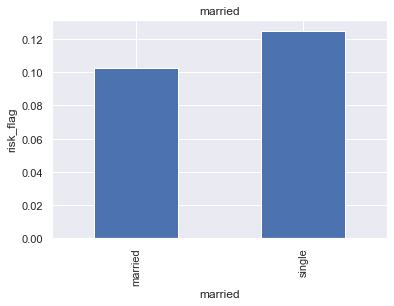

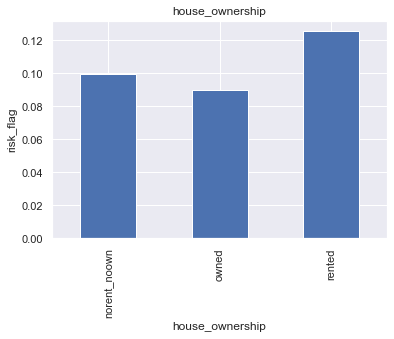

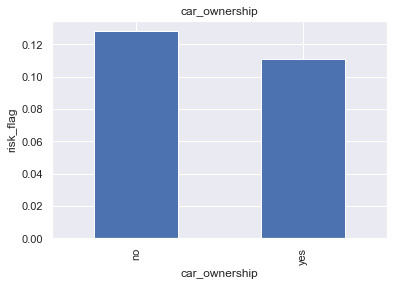

In [14]:
categorical_vs_target(df_train, categorical_features, 'risk_flag')

In [15]:
df_train['state'].value_counts()/len(df_train)

Uttar_Pradesh        0.112698
Maharashtra          0.101437
Andhra_Pradesh       0.100385
West_Bengal          0.093187
Bihar                0.078492
Tamil_Nadu           0.065623
Madhya_Pradesh       0.056040
Karnataka            0.047044
Gujarat              0.045270
Rajasthan            0.036405
Jharkhand            0.035575
Haryana              0.031310
Telangana            0.029857
Assam                0.028024
Kerala               0.023036
Delhi                0.021786
Punjab               0.018730
Odisha               0.018484
Chhattisgarh         0.015214
Uttarakhand          0.007437
Jammu_and_Kashmir    0.007063
Puducherry           0.005687
Manipur              0.003369
Mizoram              0.003369
Himachal_Pradesh     0.003306
Tripura              0.003210
Uttar_Pradesh[5]     0.002948
Chandigarh           0.002603
Sikkim               0.002413
Name: state, dtype: float64

In [16]:
df_test['state'].value_counts()/len(df_test)

Uttar Pradesh        0.111071
Andhra Pradesh       0.105607
Maharashtra          0.101071
West Bengal          0.092607
Bihar                0.082143
Tamil Nadu           0.068786
Madhya Pradesh       0.055679
Karnataka            0.045679
Gujarat              0.045107
Rajasthan            0.037179
Jharkhand            0.034643
Haryana              0.030000
Telangana            0.029821
Assam                0.027250
Kerala               0.020500
Delhi                0.020143
Punjab               0.017964
Odisha               0.017500
Chhattisgarh         0.015571
Uttarakhand          0.007036
Jammu and Kashmir    0.007000
Puducherry           0.006179
Mizoram              0.004107
Manipur              0.003679
Himachal Pradesh     0.003071
Tripura              0.003000
Uttar Pradesh[5]     0.002714
Sikkim               0.002500
Chandigarh           0.002393
Name: state, dtype: float64